In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
len(X_train)

60000

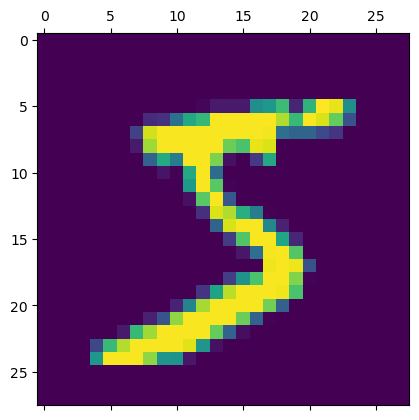

In [8]:
plt.matshow(X_train[0])

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

# Flattening the dataset and then applying ann

In [37]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

In [38]:
X_train_flat.shape

(60000, 784)

In [39]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3039 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9259


In [40]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.9259


[0.2680133581161499, 0.9258999824523926]

In [41]:
y_predicted=model.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


In [42]:
y_predicted[0]

array([9.53843351e-03, 4.54750847e-07, 5.42021506e-02, 9.39453542e-01,
       1.51163375e-03, 1.02657847e-01, 9.50212666e-07, 9.99825418e-01,
       1.02208845e-01, 5.98290086e-01], dtype=float32)

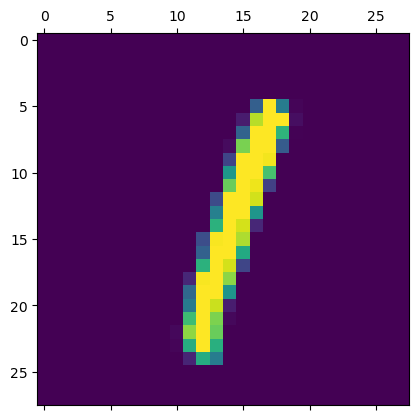

In [45]:
plt.matshow(X_test[5])

In [46]:
np.argmax(y_predicted[5])

1

In [47]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(50.722222222222214, 0.5, 'Truth')

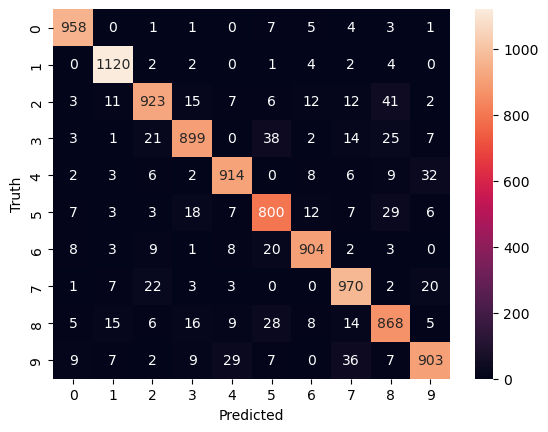

In [53]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

# With Hidden Layers

In [56]:
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9845


In [57]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9756


[0.07629909366369247, 0.975600004196167]

In [60]:
y_predicted_1=model.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


In [61]:
np.argmax(y_predicted_1[3])

0

# Flattening the input database along with the ann

In [13]:
from tensorflow import keras
model_1= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model_1.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

model_1.fit(X_train,y_train,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1225 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0521 - accuracy: 0.9841


In [14]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0885 - accuracy: 0.9747


[0.08852997422218323, 0.9746999740600586]

# Using CNN

In [15]:
from tensorflow.keras import layers,models,datasets

In [24]:
cnn=models.Sequential([
    layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [25]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
cnn.fit(X_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1601 - accuracy: 0.9515
Epoch 2/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0533 - accuracy: 0.9837
Epoch 3/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 4/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 5/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 6/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0111 - accuracy: 0.9963


In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0450 - accuracy: 0.9867


[0.045022934675216675, 0.9866999983787537]